https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a`

Ejemplos de normalizadores y estandarizadores:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf#:~:text=Normalization%20and%20Standardization.-,Normalization%20typically%20means%20rescales%20the%20values%20into%20a%20range%20of,of%201%20(unit%20variance).

![](compare_n_s.png)

In [1]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


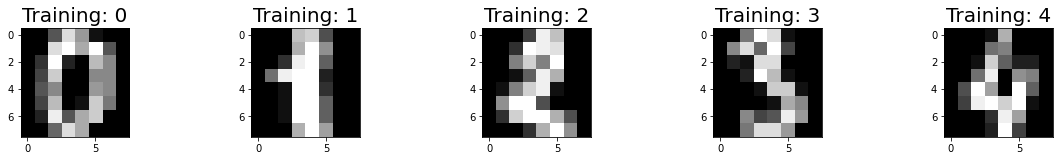

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

# With Normalization

In [122]:
X = digits.data.copy()
y = digits.target.copy()

In [131]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [138]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [144]:
X.shape

(1797, 64)

In [148]:
X[0].shape

(64,)

In [152]:
X[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [27]:
# Como son clases, los números no albergan proporcionalidad entre ellos. 
# Es decir, la clase 2 no es el doble que la clase 1.

y_ = [0, 1, 2, 3, 4, 5,6, 7, 8, 9]


In [28]:
print("Range no normalized (Normal loaded digits):\n")
print("[", min(X[1]), ",", max(X[1]), "]", sep="")

Range no normalized (Normal loaded digits):

[0.0,16.0]


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)
X_normalized

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [30]:
X_normalized[1]

array([0.        , 0.        , 0.        , 0.75      , 0.8125    ,
       0.3125    , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6875    , 1.        , 0.5625    , 0.        ,
       0.        , 0.        , 0.        , 0.1875    , 0.9375    ,
       1.        , 0.375     , 0.        , 0.        , 0.        ,
       0.46666667, 0.9375    , 1.        , 1.        , 0.125     ,
       0.        , 0.        , 0.        , 0.        , 0.0625    ,
       1.        , 1.        , 0.1875    , 0.        , 0.        ,
       0.        , 0.        , 0.0625    , 1.        , 1.        ,
       0.375     , 0.        , 0.        , 0.        , 0.        ,
       0.0625    , 1.        , 1.        , 0.375     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.6875    ,
       1.        , 0.625     , 0.        , 0.        ])

In [31]:
print("Range normalized:\n")
print("[", min(X_normalized[1]), ",", max(X_normalized[1]), "]", sep="")

Range normalized:

[0.0,1.0]


In [95]:
from sklearn.model_selection import train_test_split
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(X_normalized, y, test_size=0.25, random_state=0)

In [153]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr_normalized = LogisticRegression()
logisticRegr_normalized.fit(x_train_n, y_train_n)

Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [154]:
# Use score method to get accuracy of model
score_regularized = logisticRegr_normalized.score(x_test_n, y_test_n)
print(score_regularized * 100, "%")

96.22222222222221 %


In [155]:
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

In [156]:

# Transformamos el dato original a la escala de nuestro modelo
# normalizamos
new_example = scaler.transform(digits.data[7].reshape(1, -1))
new_example

array([[0.        , 0.        , 0.4375    , 0.5       , 0.8125    ,
        1.        , 0.9375    , 0.06666667, 0.        , 0.        ,
        0.4375    , 0.4375    , 0.25      , 0.6875    , 0.75      ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.8125    , 0.0625    , 0.        , 0.        ,
        0.26666667, 0.5       , 0.5       , 0.9375    , 0.9375    ,
        0.4       , 0.        , 0.        , 0.14285714, 0.6875    ,
        0.9375    , 0.9375    , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.3125    ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5625    , 0.9375    , 0.0625    , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8125    , 0.3125    ,
        0.        , 0.        , 0.        , 0.        ]])

In [157]:
logisticRegr_normalized.predict(new_example)

array([7])

In [158]:
scaler.inverse_transform(new_example)

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
         8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
         0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

Ahora, para predecir nuevos valores, tenemos que dar al algoritmo entrenado los datos normalizados.

### De prueba, testeo de una imagen no normalizada en un modelo con datos normalizados.

In [159]:
digits.data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [160]:
logisticRegr_normalized.predict(digits.data[2].reshape(1, -1))

array([1])

# Now with non normalized data

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [162]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [163]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.11111111111111 %


### Measuring Model Performance (Digits Dataset)

In [164]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.11111111111111 %


In [165]:
logisticRegr.predict(digits.data[2].reshape(1, -1))

array([2])